*The script to create the submission is in the end of the file.

In [354]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

# Reading train and test files

In [355]:
train = pd.read_csv("/home/jardel/data-learning-ml/FCTdata/train.csv")
train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [356]:
test = pd.read_csv("/home/jardel/data-learning-ml/FCTdata/test.csv")
test.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,15121,2680,354,14,0,0,2684,196,214,156,...,0,0,0,0,0,0,0,0,0,0
1,15122,2683,0,13,0,0,2654,201,216,152,...,0,0,0,0,0,0,0,0,0,0
2,15123,2713,16,15,0,0,2980,206,208,137,...,0,0,0,0,0,0,0,0,0,0
3,15124,2709,24,17,0,0,2950,208,201,125,...,0,0,0,0,0,0,0,0,0,0
4,15125,2706,29,19,0,0,2920,210,195,115,...,0,0,0,0,0,0,0,0,0,0


# EDA

In [292]:
#checking null values
for col in train.columns:
    if train[col].isnull().values.any():
        print(col, train[col].isnull().sum())

for col in test.columns:
    if train[col].isnull().values.any():
        print(col, train[col].isnull().sum())
              
        

In [293]:
print(train.shape, test.shape)

(15120, 56) (565892, 55)


In [294]:
train.dtypes

Id                                    int64
Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                      

In [295]:
train.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


Text(0.5, 1.0, 'Cover Type Barplot')

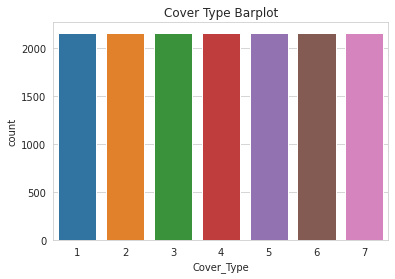

In [296]:
sns.countplot(train["Cover_Type"])
plt.title("Cover Type Barplot")

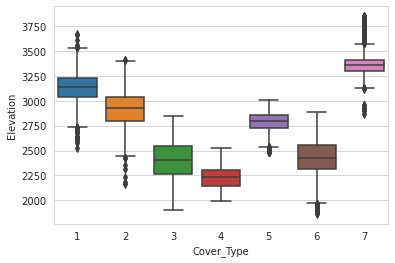

In [297]:
sns.boxplot(x="Cover_Type", y="Elevation", data=train)

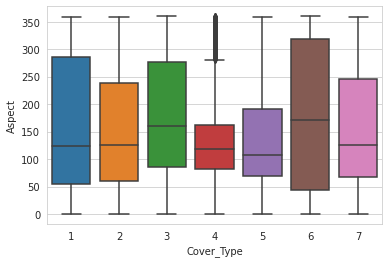

In [298]:
sns.boxplot(x="Cover_Type", y="Aspect", data=train)

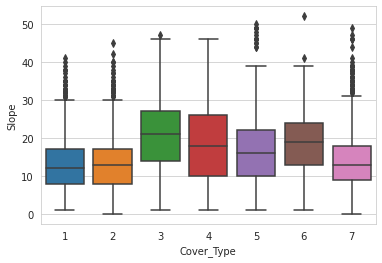

In [299]:
sns.boxplot(x="Cover_Type", y="Slope", data=train)

Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x7f29c6ec3358>>
Traceback (most recent call last):
  File "/home/jardel/.local/lib/python3.6/site-packages/xgboost/core.py", line 368, in __del__
    if self.handle is not None:
AttributeError: 'DMatrix' object has no attribute 'handle'


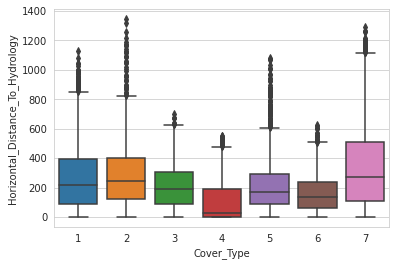

In [300]:
sns.boxplot(x="Cover_Type", y="Horizontal_Distance_To_Hydrology", data=train)

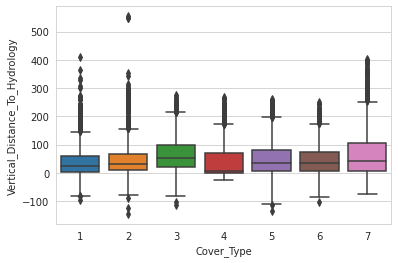

In [301]:
sns.boxplot(x="Cover_Type", y="Vertical_Distance_To_Hydrology", data=train)

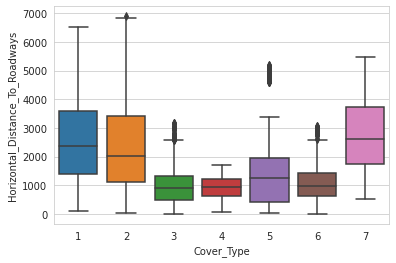

In [302]:
sns.boxplot(x="Cover_Type", y="Horizontal_Distance_To_Roadways", data=train)

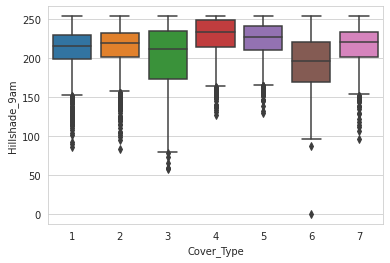

In [303]:
sns.boxplot(x="Cover_Type", y="Hillshade_9am", data=train)

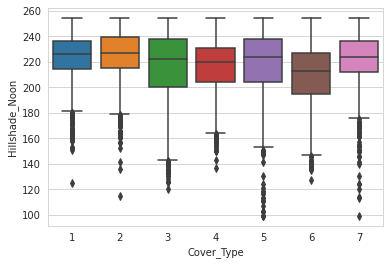

In [304]:
sns.boxplot(x="Cover_Type", y="Hillshade_Noon", data=train)

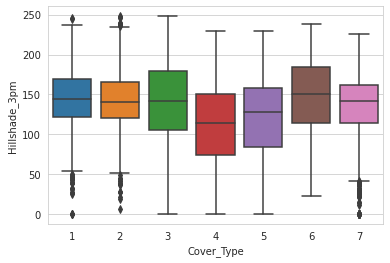

In [305]:
sns.boxplot(x="Cover_Type", y="Hillshade_3pm", data=train)

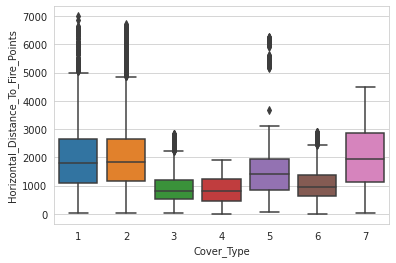

In [306]:
sns.boxplot(x="Cover_Type", y="Horizontal_Distance_To_Fire_Points", data=train)


Text(0.5, 0, 'Type')

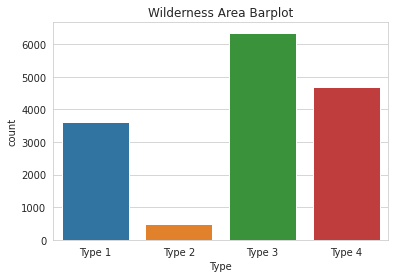

In [172]:
p=sns.countplot(train["WA"])
plt.title("Wilderness Area Barplot")
p.set_xticklabels(["Type 1","Type 2","Type 3","Type 4"])
p.set_xlabel("Type")

Text(0.5, 0, 'Type')

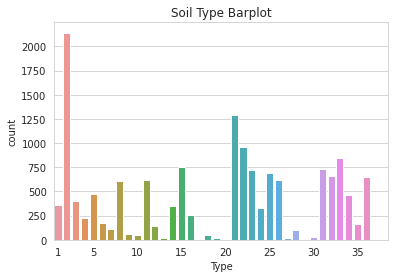

In [173]:
p = sns.countplot(train["ST"])
plt.title("Soil Type Barplot")
p.set_xticklabels(['1','','','','5','','','','','10',
                   '','','','','15','','','','','20',
                   '','','','','25','','','','','30',
                   '','','','','35','','',''])
p.set_xlabel("Type")

# Feature Engineering

In [357]:
rem = ['Id','WA','ST','Cover_Type']

In [358]:
#Wilderness Area feature (for plotting reasons)
l1 = ["Wilderness_Area1","Wilderness_Area2","Wilderness_Area3","Wilderness_Area4"]

xstack = train[l1].stack()
train["WA"] = pd.Series(pd.Categorical(xstack.loc[xstack!=0].index.get_level_values(1)))

In [359]:
#Soil_Type feature (for plotting reasons)
l2 =[]
for i in range(1,41):
    s = "Soil_Type" + str(i)
    l2.append(s)
xstack = train[l].stack()
train["ST"] = pd.Series(pd.Categorical(xstack.loc[xstack!=0].index.get_level_values(1)))


In [363]:
#elevation feature
train["p_elev"] = train["Elevation"]*100
test["p_elev"] = test["Elevation"]*100

# Validation

In [337]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedKFold
import xgboost

In [350]:
X = train.drop(rem, axis=1)
y = train["Cover_Type"]
results = []

kf = RepeatedKFold(n_splits=2,n_repeats=10,random_state=10)

for train_l, valid_l in kf.split(X):
    X_train, X_valid = X.iloc[train_l],X.iloc[valid_l]
    y_train, y_valid = y.iloc[train_l],y.iloc[valid_l]
    
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    p = model.predict(X_valid)
    results.append(np.mean(p==y_valid))

In [351]:
print(np.mean(results))

0.8409589947089946


# Create Submission

In [364]:
X = train.drop(rem,axis=1)

model = RandomForestClassifier()
model.fit(X,train["Cover_Type"])
p = model.predict(test.drop("Id",axis=1))


In [365]:
sub = pd.Series(p,index=test["Id"],name="Cover_Type")
sub.to_csv("submission.csv",header=True)